# week4 授業課題 信用情報

## 【問題1】コンペティション内容の確認

- 何を学習し、何を予測するのか

貸し倒れに関する要素を学習、個人が貸し倒るかどうかを予測

- どのようなファイルを作りKaggleに提出するか
>For each SK_ID_CURR in the test set, you must predict a probability for the TARGET variable. The file should contain a header and have the following format:

SK_ID_CURR,TARGET
100001,0.1
100005,0.9
100013,0.2

- 提出されたものはどういった指標値で評価されるのか
>area under the ROC curve between the predicted probability and the observed target.

## 【問題2】学習と検証

In [1]:
#データを簡単に分析、前処理し、学習、検証するまでの一連の流れを作成・実行
import numpy as np
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns

path = '/Users/toyodasatomi/Desktop/DIC/data/application_train.csv'
df = pd.read_csv(path)

In [2]:
# .head()、.info()、describe()などを使う
display(df.head(10))
print(df.info())
#print(df.describe())

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
6,100009,0,Cash loans,F,Y,Y,1,171000.0,1560726.0,41301.0,...,0,0,0,0,0.0,0.0,0.0,1.0,1.0,2.0
7,100010,0,Cash loans,M,Y,Y,0,360000.0,1530000.0,42075.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
8,100011,0,Cash loans,F,N,Y,0,112500.0,1019610.0,33826.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
9,100012,0,Revolving loans,M,N,Y,0,135000.0,405000.0,20250.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB
None


In [54]:
#欠損値の有無を見る
import missingno as msno
import matplotlib.pyplot as plt

%matplotlib inline
for i in df.columns:
    print(i, df[i].isnull().sum(), sep = ":")

SK_ID_CURR:0
TARGET:0
NAME_CONTRACT_TYPE:0
CODE_GENDER:0
FLAG_OWN_CAR:0
FLAG_OWN_REALTY:0
CNT_CHILDREN:0
AMT_INCOME_TOTAL:0
AMT_CREDIT:0
AMT_ANNUITY:12
AMT_GOODS_PRICE:278
NAME_TYPE_SUITE:1292
NAME_INCOME_TYPE:0
NAME_EDUCATION_TYPE:0
NAME_FAMILY_STATUS:0
NAME_HOUSING_TYPE:0
REGION_POPULATION_RELATIVE:0
DAYS_BIRTH:0
DAYS_EMPLOYED:0
DAYS_REGISTRATION:0
DAYS_ID_PUBLISH:0
OWN_CAR_AGE:202929
FLAG_MOBIL:0
FLAG_EMP_PHONE:0
FLAG_WORK_PHONE:0
FLAG_CONT_MOBILE:0
FLAG_PHONE:0
FLAG_EMAIL:0
OCCUPATION_TYPE:96391
CNT_FAM_MEMBERS:2
REGION_RATING_CLIENT:0
REGION_RATING_CLIENT_W_CITY:0
WEEKDAY_APPR_PROCESS_START:0
HOUR_APPR_PROCESS_START:0
REG_REGION_NOT_LIVE_REGION:0
REG_REGION_NOT_WORK_REGION:0
LIVE_REGION_NOT_WORK_REGION:0
REG_CITY_NOT_LIVE_CITY:0
REG_CITY_NOT_WORK_CITY:0
LIVE_CITY_NOT_WORK_CITY:0
ORGANIZATION_TYPE:0
EXT_SOURCE_1:173378
EXT_SOURCE_2:660
EXT_SOURCE_3:60965
APARTMENTS_AVG:156061
BASEMENTAREA_AVG:179943
YEARS_BEGINEXPLUATATION_AVG:150007
YEARS_BUILD_AVG:204488
COMMONAREA_AVG:214865
ELE

In [5]:
pip install category_encoders

Note: you may need to restart the kernel to use updated packages.


In [3]:
#ダミー変数化
import category_encoders as ce

#エンコードしたい列を指定　# Eoncodeしたい列をリストで指定。もちろん複数指定可能。
#全て
list_cols = ['NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','CNT_CHILDREN'
            ,'NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','NAME_TYPE_SUITE','NAME_INCOME_TYPE'
            ,'NAME_EDUCATION_TYPE','OCCUPATION_TYPE','WEEKDAY_APPR_PROCESS_START','ORGANIZATION_TYPE'
            ,'FONDKAPREMONT_MODE','HOUSETYPE_MODE','WALLSMATERIAL_MODE','EMERGENCYSTATE_MODE']
# OneHotEncodeしたい列を指定。Nullや不明の場合の補完方法も指定。
ce_ohe = ce.OneHotEncoder(cols=list_cols,handle_unknown='impute')
# pd.DataFrameをそのまま突っ込む
df_gender_onehot = ce_ohe.fit_transform(df)

In [5]:
display(df_gender_onehot.head())

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_1,NAME_CONTRACT_TYPE_2,CODE_GENDER_1,CODE_GENDER_2,CODE_GENDER_3,FLAG_OWN_CAR_1,FLAG_OWN_CAR_2,FLAG_OWN_REALTY_1,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,1,0,1,0,0,1,0,1,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,1,0,0,1,0,1,0,0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,0,1,1,0,0,0,1,1,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,1,0,0,1,0,1,0,1,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,1,0,1,0,0,1,0,1,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


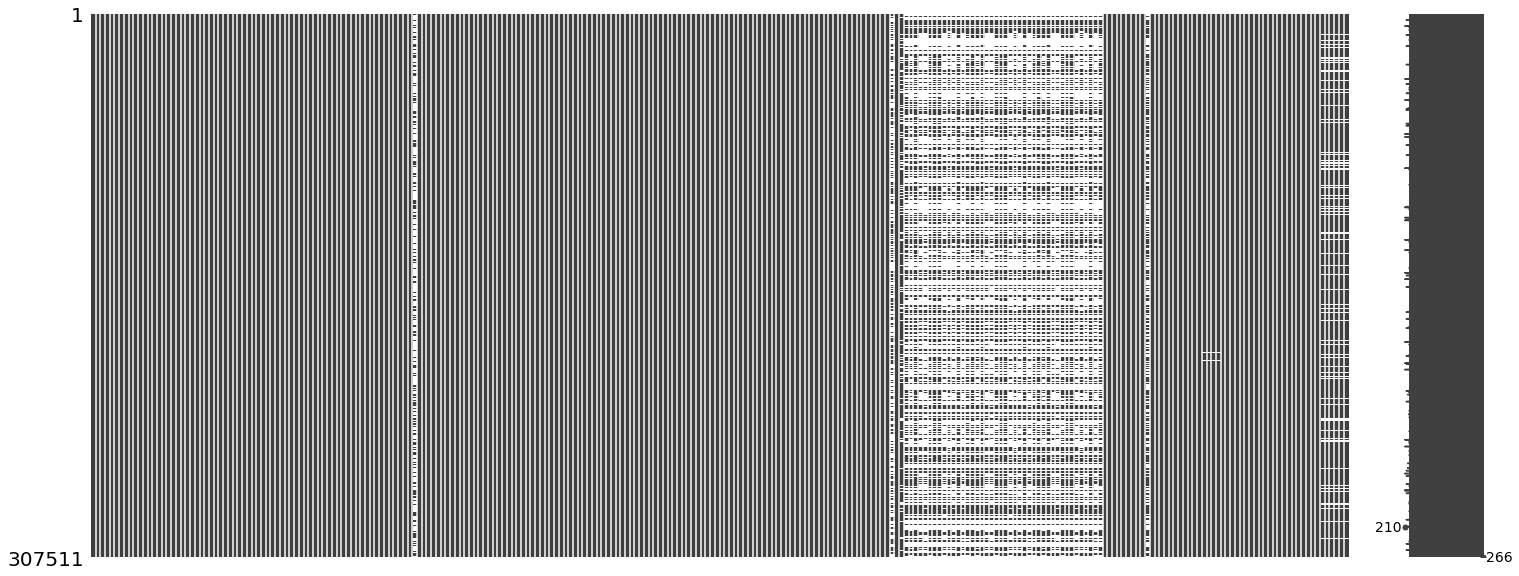

In [7]:
#msno.matrix(df_gender_onehot)

In [6]:
#欠損確認
for i in df_gender_onehot.columns:
    print(i, df_gender_onehot[i].isnull().sum(), sep = ":")
#display(df['OCCUPATION_TYPE'])

SK_ID_CURR:0
TARGET:0
NAME_CONTRACT_TYPE_1:0
NAME_CONTRACT_TYPE_2:0
CODE_GENDER_1:0
CODE_GENDER_2:0
CODE_GENDER_3:0
FLAG_OWN_CAR_1:0
FLAG_OWN_CAR_2:0
FLAG_OWN_REALTY_1:0
FLAG_OWN_REALTY_2:0
CNT_CHILDREN_1:0
CNT_CHILDREN_2:0
CNT_CHILDREN_3:0
CNT_CHILDREN_4:0
CNT_CHILDREN_5:0
CNT_CHILDREN_6:0
CNT_CHILDREN_7:0
CNT_CHILDREN_8:0
CNT_CHILDREN_9:0
CNT_CHILDREN_10:0
CNT_CHILDREN_11:0
CNT_CHILDREN_12:0
CNT_CHILDREN_13:0
CNT_CHILDREN_14:0
CNT_CHILDREN_15:0
AMT_INCOME_TOTAL:0
AMT_CREDIT:0
AMT_ANNUITY:12
AMT_GOODS_PRICE:278
NAME_TYPE_SUITE_1:0
NAME_TYPE_SUITE_2:0
NAME_TYPE_SUITE_3:0
NAME_TYPE_SUITE_4:0
NAME_TYPE_SUITE_5:0
NAME_TYPE_SUITE_6:0
NAME_TYPE_SUITE_7:0
NAME_TYPE_SUITE_8:0
NAME_INCOME_TYPE_1:0
NAME_INCOME_TYPE_2:0
NAME_INCOME_TYPE_3:0
NAME_INCOME_TYPE_4:0
NAME_INCOME_TYPE_5:0
NAME_INCOME_TYPE_6:0
NAME_INCOME_TYPE_7:0
NAME_INCOME_TYPE_8:0
NAME_EDUCATION_TYPE_1:0
NAME_EDUCATION_TYPE_2:0
NAME_EDUCATION_TYPE_3:0
NAME_EDUCATION_TYPE_4:0
NAME_EDUCATION_TYPE_5:0
NAME_FAMILY_STATUS_1:0
NAME_FAMILY

In [7]:
df_sus_EXT = df_gender_onehot.loc[:,'EXT_SOURCE_1':'NONLIVINGAREA_MEDI']

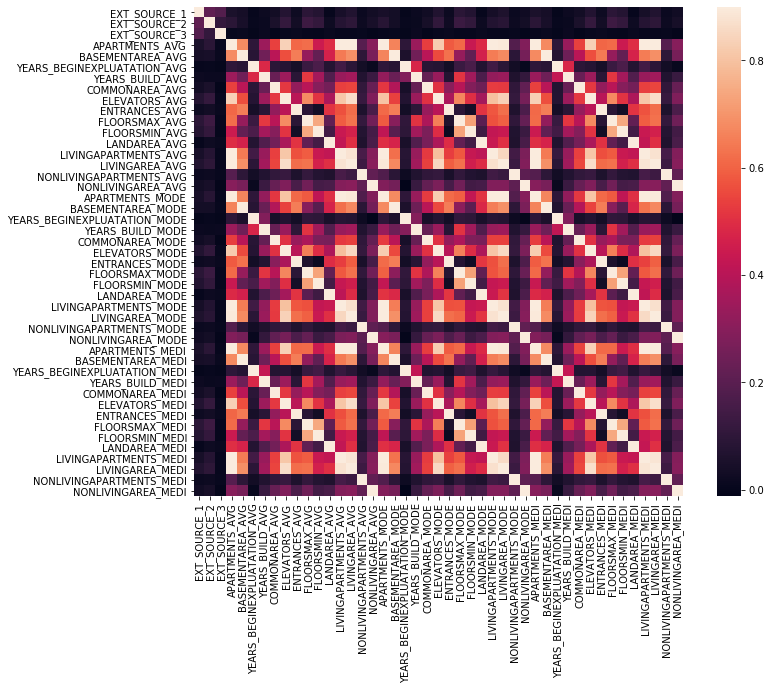

In [8]:
corr_sus_EXT = df_sus_EXT.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corr_sus_EXT, vmax=0.9, square = True)

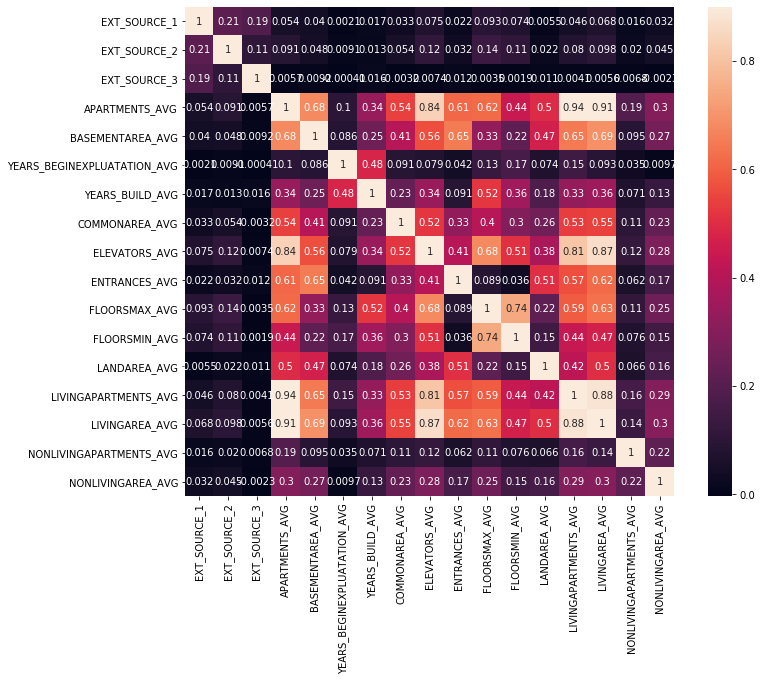

In [9]:
#見にくいので、一区画のみにする
df_sus_EXT2 = df_gender_onehot.loc[:,'EXT_SOURCE_1':'NONLIVINGAREA_AVG']
corr_sus_EXT2 = df_sus_EXT2.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corr_sus_EXT2, vmax=0.9, square = True, annot= True)

In [4]:
#欠損を全部０で埋める
df_gender_onehot_0 = df_gender_onehot.fillna(0)
#display(df_gender_onehot_0)

In [5]:
#平均で埋める
#from sklearn.preprocessing import Imputer
#imr = Imputer(missing_values='NaN',strategy='mean', axis = 0)
#df_gender_onehot_mean = imr.fit_transform(df_gender_onehot)
df_gender_onehot_mean = df_gender_onehot.fillna(df_gender_onehot.mean())
#display(df_gender_onehot_mean)

In [6]:
#線形補間で埋める?
#とりあえず最頻値、中央値で埋める
df_gender_onehot_med = df_gender_onehot.fillna(df_gender_onehot.median())
df_gender_onehot_mode = df_gender_onehot.fillna(df_gender_onehot.mode())

In [12]:
#データを結合 -> 処理大きすぎてカーネルが止まるので断念
#df_mix_1 = pd.merge(df_gender_onehot_0, df_gender_onehot_mean,on="TARGET", how = "outer")

#df_gender_onehot_med, df_gender_onehot_mode
#print(df_mix.shape)

In [35]:
#ターゲットを分ける
#pd.set_option('display.max_columns',1000)
#display(df_mix.head(2)['WALLSMATERIAL_MODE_5'])
from sklearn.model_selection import train_test_split

X = df_gender_onehot_0.drop("TARGET", axis = 1)
y = df_gender_onehot_0.loc[:,'TARGET']
X_0_train, X_0_test, y_0_train, y_0_test = train_test_split(X, y, test_size=0.25, shuffle= 'True',stratify=df_gender_onehot_0["TARGET"])



In [36]:
display(X_0_train.shape)

(230633, 265)

In [24]:
#print(y_0_test)

In [14]:
#標準化（必要？)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
print(scaler.fit(X_0_train))

StandardScaler(copy=True, with_mean=True, with_std=True)


In [15]:
X_0_trains = scaler.transform(X_0_train)
X_0_tests = scaler.transform(X_0_test)

In [13]:
#ランダムフォレスト 
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, max_depth = 2, random_state = 0)


In [37]:
#標準化なしで学習
rf.fit(X_0_train, y_0_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=2, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [18]:
#print(rf.feature_importances_)
X_0_fi = rf.feature_importances_
#予測
y_0_pred = rf.predict(X_0_test)

In [19]:
y_0_pred_proba = rf.predict_proba(X_0_test)

In [20]:
display(y_0_pred_proba)

array([[0.92149488, 0.07850512],
       [0.91897049, 0.08102951],
       [0.92567902, 0.07432098],
       ...,
       [0.90873729, 0.09126271],
       [0.89994759, 0.10005241],
       [0.92120702, 0.07879298]])

In [21]:
print(y_0_pred_proba[:,0])

[0.92149488 0.91897049 0.92567902 ... 0.90873729 0.89994759 0.92120702]


In [22]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_0_test,y_0_pred))

#from sklearn.metrics import precision_score
#from sklearn.metrics import recall_score
#from sklearn.metrics import f1_score

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_0_test,y_0_pred))

0.9192746949712531
[[70672     0]
 [ 6206     0]]


In [23]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_0_test, y_0_pred_proba[:,1])

0.7059841241589146

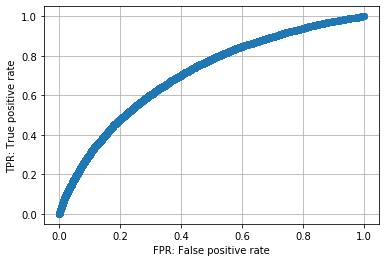

In [24]:
#ROC曲線
from sklearn.metrics import roc_curve
#y_0_score = rf.score(X_0_test, y_0_test,sample_weight=None)

fpr, tpr, thresholds = roc_curve(y_0_test, y_0_pred_proba[:,1])

plt.plot(fpr, tpr, marker='o')
plt.xlabel('FPR: False positive rate')
plt.ylabel('TPR: True positive rate')
plt.grid()

In [21]:
from sklearn.metrics import roc_auc_score

In [26]:
roc_auc_score(y_0_test, y_0_pred)

0.5

(265,)
(265,)


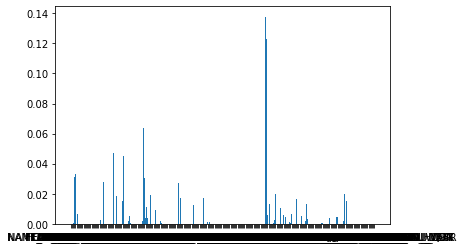

In [27]:
print(X_0_train.columns.shape)
print(X_0_fi.shape)
#X_0_fi_data = pd.DataFrame(X_0_fi, columns = [X_0_train.columns])
plt.bar(X_0_train.columns, X_0_fi)
plt.show()

In [30]:
X_0_ifarray = np.vstack([X_0_train.columns,X_0_fi])
#display(X_0_ifcheck)
X_0_ifcheck = np.sort(X_0_ifarray, axis=1)[::-1]
#display(X_0_ifcheck)
X_0_fi_data = pd.DataFrame(X_0_ifcheck)
display(X_0_fi_data)
X_0_fi_data_short = X_0_fi_data.loc[:,250:]

,0,1,2,3,4,5,6,7,8,9,...,255,256,257,258,259,260,261,262,263,264
0,0,0,0,0,0,0,0,0,0,0,...,0.0302636,0.0311746,0.0331633,0.0382258,0.0400607,0.0483386,0.0564974,0.0677315,0.124588,0.127927
1,AMT_ANNUITY,AMT_CREDIT,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_YEAR,...,WEEKDAY_APPR_PROCESS_START_4,WEEKDAY_APPR_PROCESS_START_5,WEEKDAY_APPR_PROCESS_START_6,WEEKDAY_APPR_PROCESS_START_7,YEARS_BEGINEXPLUATATION_AVG,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_AVG,YEARS_BUILD_MEDI,YEARS_BUILD_MODE


## 【問題3】テストデータに対する推定

In [69]:
df_sus_EXT2 = df_gender_onehot.loc[:,['TARGET','EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3']]

In [70]:
df_test_sus_EXT2 = df_test_gender_onehot.loc[:,['EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3']]

In [71]:
display(df_test_sus_EXT2.head())

,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3
0,0.752614,0.789654,0.159520
1,0.564990,0.291656,0.432962
2,NaN,0.699787,0.610991
3,0.525734,0.509677,0.612704
4,0.202145,0.425687,NaN


In [72]:
display(df_sus_EXT2.head())

,TARGET,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3
0,1,0.083037,0.262949,0.139376
1,0,0.311267,0.622246,NaN
2,0,NaN,0.555912,0.729567
3,0,NaN,0.650442,NaN
4,0,NaN,0.322738,NaN


In [77]:
X = df_sus_EXT2.drop("TARGET", axis = 1)
y = df_sus_EXT2.loc[:,'TARGET']
X_3_train, X_3_test, y_3_train, y_3_test = train_test_split(X, y, test_size=0.25, shuffle= 'True',stratify=df_gender_onehot_0["TARGET"])

In [48]:
display(df_test_sus_EXT2.shape)

(48744, 17)

In [64]:
path = '/Users/toyodasatomi/Desktop/DIC/data/application_test.csv'
df_test = pd.read_csv(path)

In [68]:
display(df_test.head())

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [66]:
# pd.DataFrameをそのまま突っ込む
df_test_gender_onehot = ce_ohe.fit_transform(df_test)

In [76]:
#欠損を全部０で埋める
df_sus_EXT2 = df_sus_EXT2.fillna(0)


In [45]:
display(df_test_gender_onehot_0.shape)

(48744, 258)

In [34]:
display(X_0_train.shape)

(230633, 265)

In [78]:
rf3 = RandomForestClassifier(n_estimators=100, max_depth = 2, random_state = 0)
rf3.fit(X_3_train, y_3_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=2, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [80]:
y_3_pred = rf3.predict(X_3_test)

In [81]:
y_3_pred_proba = rf3.predict_proba(X_3_test)

In [82]:
print(accuracy_score(y_3_test,y_3_pred))

0.9192746949712531


In [83]:
roc_auc_score(y_3_test, y_3_pred_proba[:,1])

0.7024394275887897

#### テストデータで

In [84]:
#欠損を全部０で埋める
df_sus_EXT2 = df_test_sus_EXT2.fillna(0)


In [85]:
y_3_test_pred = rf3.predict(df_sus_EXT2)

In [86]:
print(y_3_test_pred)

[0 0 0 ... 0 0 0]


In [87]:
y_3_test_pred_proba = rf3.predict_proba(df_sus_EXT2)

In [90]:
print(y_3_test_pred_proba)

[[0.93614239 0.06385761]
 [0.91186502 0.08813498]
 [0.94513411 0.05486589]
 ...
 [0.93551084 0.06448916]
 [0.93791036 0.06208964]
 [0.90289292 0.09710708]]


In [92]:
a=df_test['SK_ID_CURR']

In [93]:
aa = np.array(a, dtype = 'int32')

In [94]:
print(aa)

[100001 100005 100013 ... 456223 456224 456250]


In [95]:
b=y_3_test_pred_proba[:,1]

In [96]:
c = np.stack([aa, b],1)

In [ ]:
#CSVで出力する
import csv
header = [ 'SK_ID_CURR', 'TARGET']

with open('/Users/toyodasatomi/Desktop/DIC/data/file.csv', 'w') as f:
    writer = csv.writer(f)
    writer.writerow(header)
    writer.writerows(c)  

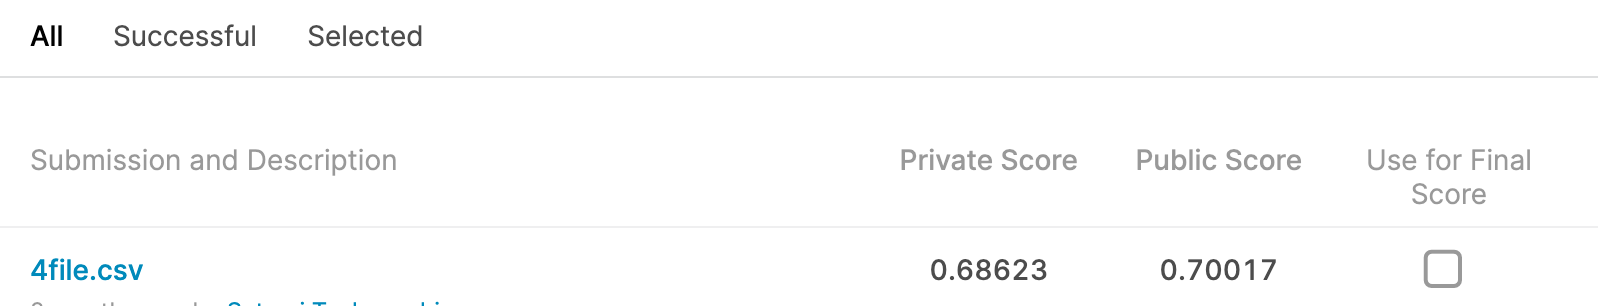

In [97]:
from IPython.display import display
from PIL import Image
Pred = "スクリーンショット 2019-12-27 14.59.56.png"
display(Image.open(Pred))

## 【問題4】特徴量エンジニアリング

#### 特徴量を任意のものだけに絞ってみる

In [63]:
df_corr = df_gender_onehot.corr()

In [86]:
#df_corr.sort_values('TARGET')

#### ①TARGETと相関の高い変数上位5つに絞ってみる

In [66]:
df_sus_top5 = df_gender_onehot.loc[:,['TARGET','EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3','NAME_EDUCATION_TYPE_2','CODE_GENDER_2']]

In [70]:
#欠損を全部０で埋める
df_sus_top5 = df_sus_top5.fillna(0)


In [71]:
X = df_sus_top5.drop("TARGET", axis = 1)
y = df_sus_top5.loc[:,'TARGET']
X_5_train, X_5_test, y_5_train, y_5_test = train_test_split(X, y, test_size=0.25, shuffle= 'True',stratify=df_sus_top5["TARGET"])


In [72]:
rf_5 = RandomForestClassifier(n_estimators=100, max_depth = 2, random_state = 0)

In [73]:
rf_5.fit(X_5_train, y_5_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=2, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [74]:
y_d_5_pred = rf_5.predict(X_5_test)

In [76]:
y_d_5_prba= rf_5.predict_proba(X_5_test)

In [77]:
roc_auc_score(y_5_test, y_d_5_prba[:,1])

0.6977765568310437

#### ②TARGETと相関が負の方向と正の方向に高いものそれぞれ3つずつピックアップしてみる

In [78]:
df_sus_top33 = df_gender_onehot.loc[:,['TARGET','EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3','DAYS_BIRTH','REGION_RATING_CLIENT_W_CITY','REGION_RATING_CLIENT']]

In [79]:
#欠損を全部０で埋める
df_sus_top33 = df_sus_top33.fillna(0)



In [80]:
X = df_sus_top33.drop("TARGET", axis = 1)
y = df_sus_top33.loc[:,'TARGET']
X_33_train, X_33_test, y_33_train, y_33_test = train_test_split(X, y, test_size=0.25, shuffle= 'True',stratify=df_sus_top33["TARGET"])



In [81]:
rf_33 = RandomForestClassifier(n_estimators=100, max_depth = 2, random_state = 0)

In [82]:
rf_33.fit(X_33_train, y_33_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=2, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [83]:
y_d_33_pred = rf_33.predict(X_33_test)

In [84]:
y_d_33_prba= rf_33.predict_proba(X_33_test)

In [85]:
roc_auc_score(y_33_test, y_d_33_prba[:,1])

0.7027831480373015

#### 前処理の欠損値を変え方にこだわってみる

#### データの欠損を削除してやってみる

In [15]:
df_d_na_pre = df_gender_onehot.dropna()

In [16]:
df_d_na = df_d_na_pre.dropna(axis=1)

In [17]:
display(df_d_na.head())

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_1,NAME_CONTRACT_TYPE_2,CODE_GENDER_1,CODE_GENDER_2,CODE_GENDER_3,FLAG_OWN_CAR_1,FLAG_OWN_CAR_2,FLAG_OWN_REALTY_1,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
71,100083,0,1,0,1,0,0,0,1,1,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
124,100145,0,1,0,0,1,0,0,1,1,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
143,100165,0,1,0,0,1,0,0,1,1,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
152,100179,0,1,0,0,1,0,0,1,0,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,4.0
161,100190,0,1,0,1,0,0,0,1,0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0


In [19]:
#ターゲットを分ける
from sklearn.model_selection import train_test_split

X = df_d_na.drop("TARGET", axis = 1)
y = df_d_na.loc[:,'TARGET']
X_d_na_train, X_d_na_test, y_d_na_train, y_d_na_test = train_test_split(X, y, test_size=0.25, stratify=df_d_na["TARGET"])



In [23]:
rf_na = RandomForestClassifier(n_estimators=100, max_depth = 2, random_state = 0)

In [24]:
rf_na.fit(X_d_na_train, y_d_na_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=2, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [25]:
y_d_na_pred = rf_na.predict(X_d_na_test)

In [26]:
yyyy= rf_na.predict_proba(X_d_na_test)

In [47]:
yyyy.shape

(2838, 2)

In [45]:
print(yyyy.T)

[[0.9381614  0.94296105 0.9193234  ... 0.94116989 0.92722859 0.93499174]
 [0.0618386  0.05703895 0.0806766  ... 0.05883011 0.07277141 0.06500826]]


In [41]:
y_d_na_test.shape

(2838,)

In [27]:
roc_auc_score(y_d_na_test, yyyy[:,1])

0.70390762558189

#### 欠損を平均で埋める

In [28]:
#平均で埋める
#from sklearn.preprocessing import Imputer
#imr = Imputer(missing_values='NaN',strategy='mean', axis = 0)
#df_gender_onehot_mean = imr.fit_transform(df_gender_onehot)
df_gender_onehot_mean = df_gender_onehot.fillna(df_gender_onehot.mean())
#display(df_gender_onehot_mean)

In [29]:
X = df_gender_onehot_mean.drop("TARGET", axis = 1)
y = df_gender_onehot_mean.loc[:,'TARGET']
X_d_mean_train, X_d_mean_test, y_d_mean_train, y_d_mean_test = train_test_split(X, y, test_size=0.25, stratify=df_gender_onehot_mean["TARGET"])

In [30]:
rf_mean = RandomForestClassifier(n_estimators=100, max_depth = 2, random_state = 0)

In [32]:
rf_mean.fit(X_d_mean_train, y_d_mean_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=2, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [33]:
y_d_mean_pred = rf_mean.predict(X_d_mean_test)

In [36]:
y_d_mean_prba= rf_mean.predict_proba(X_d_mean_test)

In [37]:
roc_auc_score(y_d_mean_test, y_d_mean_prba[:,1])

0.710386210613915

#### 最頻値で埋める

In [50]:
#線形補間で埋める?
#とりあえず最頻値、中央値で埋める
df_gender_onehot_med = df_gender_onehot.fillna(df_gender_onehot.median())
df_gender_onehot_mode = df_gender_onehot.fillna(df_gender_onehot.mode())

In [41]:
X = df_gender_onehot_med.drop("TARGET", axis = 1)
y = df_gender_onehot_med.loc[:,'TARGET']
X_d_med_train, X_d_med_test, y_d_med_train, y_d_med_test = train_test_split(X, y, test_size=0.25, stratify=df_gender_onehot_med["TARGET"])

In [42]:
rf_med = RandomForestClassifier(n_estimators=100, max_depth = 2, random_state = 0)

In [43]:
rf_med.fit(X_d_med_train, y_d_med_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=2, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [44]:
y_d_med_pred = rf_med.predict(X_d_med_test)

In [45]:
y_d_med_prba= rf_med.predict_proba(X_d_med_test)

In [46]:
roc_auc_score(y_d_med_test, y_d_med_prba[:,1])

0.7150194044816737

#### 中央値で埋める エラー解決できず実行できなかった・・

In [57]:
X = df_gender_onehot_mode.drop("TARGET", axis = 1)
y = df_gender_onehot_mode.loc[:,'TARGET']

In [62]:
#X.drop(X.columns[np.isnan(X).any()], axis=1)

In [59]:
X_d_mode_train, X_d_mode_test, y_d_mode_train, y_d_mode_test = train_test_split(X, y, test_size=0.25, stratify=df_gender_onehot_mode["TARGET"])

In [60]:
rf_mode = RandomForestClassifier(n_estimators=100, max_depth = 2, random_state = 0)

In [61]:
rf_mode.fit(X_d_mode_train, y_d_mode_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [ ]:
y_d_mode_pred = rf_mode.predict(X_d_mode_test)

In [ ]:
y_d_mode_prba= rf_mode.predict_proba(X_d_mode_test)

In [ ]:
roc_auc_score(y_d_mode_test, y_d_mode_prba[:,1])

In [56]:
for i in df_gender_onehot_med.columns:
    print(i, df_gender_onehot_med[i].isnull().sum(), sep = ":")

SK_ID_CURR:0
TARGET:0
NAME_CONTRACT_TYPE_1:0
NAME_CONTRACT_TYPE_2:0
CODE_GENDER_1:0
CODE_GENDER_2:0
CODE_GENDER_3:0
FLAG_OWN_CAR_1:0
FLAG_OWN_CAR_2:0
FLAG_OWN_REALTY_1:0
FLAG_OWN_REALTY_2:0
CNT_CHILDREN_1:0
CNT_CHILDREN_2:0
CNT_CHILDREN_3:0
CNT_CHILDREN_4:0
CNT_CHILDREN_5:0
CNT_CHILDREN_6:0
CNT_CHILDREN_7:0
CNT_CHILDREN_8:0
CNT_CHILDREN_9:0
CNT_CHILDREN_10:0
CNT_CHILDREN_11:0
CNT_CHILDREN_12:0
CNT_CHILDREN_13:0
CNT_CHILDREN_14:0
CNT_CHILDREN_15:0
AMT_INCOME_TOTAL:0
AMT_CREDIT:0
AMT_ANNUITY:0
AMT_GOODS_PRICE:0
NAME_TYPE_SUITE_1:0
NAME_TYPE_SUITE_2:0
NAME_TYPE_SUITE_3:0
NAME_TYPE_SUITE_4:0
NAME_TYPE_SUITE_5:0
NAME_TYPE_SUITE_6:0
NAME_TYPE_SUITE_7:0
NAME_TYPE_SUITE_8:0
NAME_INCOME_TYPE_1:0
NAME_INCOME_TYPE_2:0
NAME_INCOME_TYPE_3:0
NAME_INCOME_TYPE_4:0
NAME_INCOME_TYPE_5:0
NAME_INCOME_TYPE_6:0
NAME_INCOME_TYPE_7:0
NAME_INCOME_TYPE_8:0
NAME_EDUCATION_TYPE_1:0
NAME_EDUCATION_TYPE_2:0
NAME_EDUCATION_TYPE_3:0
NAME_EDUCATION_TYPE_4:0
NAME_EDUCATION_TYPE_5:0
NAME_FAMILY_STATUS_1:0
NAME_FAMILY_ST

#### 結論　今回のコンペについては欠損の埋め方でそれほど精度は変わらなそう